## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df= pd.read_csv("ab_data.csv")
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

There is 294478 rows in the dataset

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

There is 290584 users

d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

 11.96% of users that converted - in the population 

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

we had to filter the dataset with the opposite conditions for landing page to answer so the answer is 3893 times

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# First filter the dataset based on incorrect condition and store it in new dataframe 
# Second Remove the incorrect rows, and store it in a new dataframe df2
false= df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")')
df2= df.drop(false.index)

In [9]:
# Double Check all of the incorrect rows
df2.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")')

,user_id,timestamp,group,landing_page,converted


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

It is equal to df users and this means removing it did not effect the total number of users

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# I tried to delete using duplicated but it seems that it did not work because of 'timestamp' difference , so It may delete both rows 
user_duplicated=df2[df2.duplicated(['user_id'])]
df2= df2.drop(user_duplicated.index)

In [14]:
# Chose one of the rows and delete it 
df2.drop(1899, inplace=True)

In [15]:
# Check again , and as shown we have only one row 
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2['converted'].mean()

0.11959749882133504

 11.96% probability that users converted - in the population 

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
df2[(df2['group'] == 'control')].converted.mean()

0.1203863045004612

 12.04% probability that controled users converted - sample

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
df2[(df2['group'] == 'treatment')].converted.mean()

0.11880888313869065

 12.1% probability that users from tretment group converted - sample 

d. What is the probability that an individual received the new page?

In [19]:
(df2['landing_page']== 'new_page').mean()

0.5000602237570677

50% probability that users received a new page - half of the population

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

- Half of the users have received the new page 
- The total probability of the converted  rate is 0.119
- The total probability of the  converted rate from the treatment group is 0.1188 
- The total probability of the converted rate from the control group is 0.1203.
<br>
Based on the results above the answer is: No <br>
This is due to the fact that the conversion of the treatment group is almost the same as the conversion of the control group.
(Under the assumption that the treatment group has received the new page)
Both of them give us roughly the same probability and percentage of conversions, which at the moment sounds good to me, even though we can't tell what effect the page has on the conversion rate. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<center> <b> H0: P<sub>new</sub> $\leq$  P<sub> old </sub>  </b> </center>
<br>
<center><b>H1: P<sub>new</sub>$\gt$ P<sub> old </sub>  </b> </center>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_new= df2['converted'].mean()
p_new

0.11959749882133504

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old= df2['converted'].mean()
p_old

0.11959749882133504

Since we assumed in null that  $p_{old}$=  $p_{new}$ so the convert rate will be the same and there is no change in the  $p_{population}$

c. What is $n_{new}$?

In [22]:
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()
n_new

145309

d. What is $n_{old}$?

In [23]:
n_old = df2.query('landing_page == "old_page"').nunique()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice([1,0], size = n_new, replace = True, p = (p_new, 1-p_new)) 
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice([1,0], size = n_old, replace = True, p = (p_old, 1-p_old))
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
#calculate the probability for each sample then subtract them from each other
new_page_converted.mean()-old_page_converted.mean()

0.0006937818033542625

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
p_diffs = []
for _ in range(10000):
    new_page_converted_simu = np.random.choice([1,0], size = n_new, replace = True, p = (p_new, 1-p_new))
    old_page_converted_simu = np.random.choice([1,0], size = n_old, replace = True, p = (p_old, 1-p_old))
    p_diffs.append(new_page_converted_simu.mean() - old_page_converted_simu.mean())  


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [28]:
# Calaculate the observe difference in the actual dataset to show in the hist 
p_actual = df2[(df2['group'] == 'treatment')].converted.mean() - df2[(df2['group'] == 'control')].converted.mean()

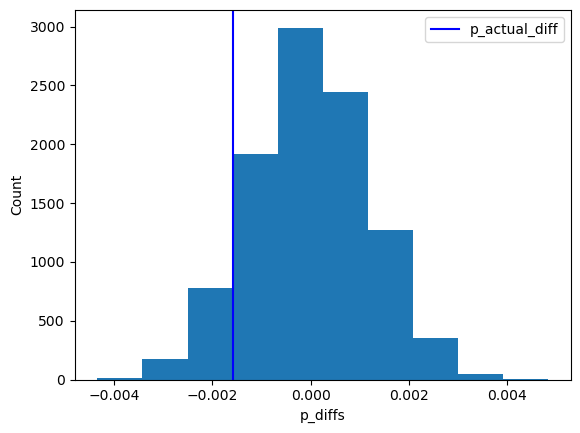

In [29]:
plt.hist(p_diffs)
# Determined  the actual difference under H0
plt.axvline(p_actual ,color='blue', label='p_actual_diff')
plt.xlabel('p_diffs')
plt.ylabel('Count')
plt.legend();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
(np.array(p_diffs) > p_actual).mean()

0.9015

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- It is called a P_value in scientific studies and represents the probability of observed data occuring under the null hypothesis occurring, if it is greater than a significant value, then we cannot reject the null hypothesis.  
In our case, the type error 1 is 5%, which is less than the p_diff 90%, so we don't have evidence to reject the null hypothesis
      - This does not indicate that the alternative is wrong -

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm
# number of conversion for each pages  
convert_old = df2.query("group == 'control'")['converted'].sum() 
convert_new = df2.query("group == 'treatment'")['converted'].sum()
# number of individuals who received each page (count becuse it is catrogical data)
n_old = df2.query("landing_page == 'old_page'").count()[0]
n_new = df2.query("landing_page == 'new_page'").count()[0]
convert_old,convert_new,n_old,n_new

(17489, 17264, 145274, 145309)

In [32]:
#null_vals = np.random.normal(0, np.std(p_diffs), len(p_diffs))
#plt.axvline(x=p_actual,color ='red')
#plt.hist(null_vals);

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
z_score, p_value = sm.stats.proportions_ztest( count= [convert_new, convert_old], nobs=[n_new, n_old], alternative='larger') 
print(z_score, p_value)
# Compare to see if it is same as the previous result 
if p_value>0.05:
    print("Null hyphothesis faill to rejected , Alternative hyphothesis rejected")
else:
    print("Null hyphothesis rejected  , Alternative hyphothesis accepted")

-1.3102408579271012 0.9049428161159749
Null hyphothesis faill to rejected , Alternative hyphothesis rejected


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

It agreed with our findings. <br>
For the 5% Alpha, the critical Z-score is 1.65, and the calculated Z-score is 1.31, which is less than the critical value, 
this means that we will fail to reject the null hypothesis. Furthermore, the p-value is almost the same as the previous one, so it is higher than type error 1, which will lead to rejecting the alternative.
<br>
In light of this, we accept the null hypothesis that states the old page's conversion rates are similar to or greater than the new page's.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?


**Logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
df2['intercept'] = 1
df2[['control_page', 'ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop('control_page', axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [36]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366119
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
print(results.summary2())

                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.0972
Date:               2023-01-11 06:14 BIC:              212801.2565
No. Observations:   290583           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19011    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3102  0.1901  -0.0374   0.0074



e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

This is because the way the p-value is calculated for each part and the way the null hypothesis is defined are different. The p-value in the ab_pages is 0.19, which is lower than 5% type error 1 and it is also slightly greater than p-value of the part II. Specifically, in Part II, we attempt to confirm that there is no static significance to support the null hypothesis, which states that the old page converts more than the new page. The objective of Part III, however, is to assess how the independent variable (ap_page =1 for the new page treatment group) affects the dependent variable (conversion rate) or if there is a relationship. Thus, we experience a one-tailed test in the first part and a two-tailed test in the second. 
Considering that we got a p-value greater than 5% in both parts, we cannot accept that there is an impact on conversion rates from pages so we fail to reject the null hypothesis. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

We must test the hypothesis against other factors to make sure it is correct and capable of predicting the dependent variable, conversion- if one factor fails to have an effect and evidence, but if there are more features it may be more complicated to interpret the coefficients or relations, as well as we may encounter outliers. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
countries_df= pd.read_csv('./countries.csv')
# Join the country with dataset
df3 = df2.set_index('user_id').join(countries_df.set_index('user_id'))

In [39]:
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [40]:
df3['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [41]:
### Create the necessary dummy variables
df3[['US', 'CA', 'UK']] = pd.get_dummies(df3['country'])

In [42]:
### Fit Your Linear Model And Obtain the Results
logit_mod1 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'US', 'UK']])
results1 = logit_mod1.fit()
results1.summary2()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8724
Date:               2023-01-11 06:14 BIC:              212823.1910
No. Observations:   290583           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290579           LLR p-value:      0.17613    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4148  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3062  0.1915  -0.0373   0.0075
US           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
UK           -0.0099    0.0133    -0.7429  0.4575  -0.0359   0.0162
==================================================================

"""

We can see from above there are no changes in the p-value, we still have more than 0.05 which indicates that the country does not affect the conversion

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
# Calculate the interaction (how the conversion rate will differ on each country given different page type )
df3['UK_abpage']=df3['UK']*df3['ab_page']
df3['US_abpage']=df3['US']*df3['ab_page']
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,US,CA,UK,UK_abpage,US_abpage
user_id,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,1,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0


In [44]:
logit_mod2 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page','UK_abpage' ,'US_abpage','UK', 'US']])
results2 = logit_mod2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.4080
Date:               2023-01-11 06:14 BIC:              212845.8859
No. Observations:   290583           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290577           LLR p-value:      0.19216    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
UK_abpage    -0.0314    0.0266    -1.1803  0.2379  -0.0835   0.0207
US_abpage    -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
UK            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
US           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
==================================================================

"""

It seems that when countries interact with a group or pages , they still have approximately equal rate of converting and it is less than 0.05.

<a id='conclusions'></a>
## Conclusions
Ultimately, we are unable to reject the null hypothesis based on our A/B tests. In this case, they should stuck or use the old page rather than the new one since the new one won't have any impact on anything.


### Resoures 
- https://towardsdatascience.com/null-hypothesis-and-the-p-value-fdc129db6502#:~:text=One%20of%20the%20most%20commonly,is%20considered%20to%20be%20true.
- https://towardsdatascience.com/a-simple-interpretation-of-logistic-regression-coefficients-e3a40a62e8cf. 
- https://www.investopedia.com/terms/z/z-test.asp#:~:text=A%20z%2Dscore%2C%20or%20z,of%20a%20group%20of%20values.
- https://mathstat.slu.edu/~speegle/_book/probchapter.html#simulationsprob
- https://datasciencechalktalk.wordpress.com/2019/11/12/bootstrap-sampling-an-implementation-with-python/
- https://www.khanacademy.org/math/statistics-probability/significance-tests-confidence-intervals-two-samples/comparing-two-means/v/hypothesis-test-for-difference-of-means
- McLeod, S. A. (2019, May 20). What a p-value tells you about statistical significance. Simply Psychology. www.simplypsychology.org/p-value.html
- https://www.youtube.com/watch?v=cW16A7hXbTo



### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.